#Chess

In [2]:
import time
import matplotlib.pyplot as plt

class Pattern:
    def __init__(self, itemset, support):
        self.itemset = itemset
        self.support = support

def has_infrequent_subset(c, Lk_minus_1):
    for i in range(len(c)):
        subset = c[:i] + c[i+1:]
        if subset not in Lk_minus_1:
            return True
    return False

def apriori_gen(Lk_minus_1):
    Ck = []
    for i in range(len(Lk_minus_1)):
        for j in range(i+1, len(Lk_minus_1)):
            l1 = Lk_minus_1[i]
            l2 = Lk_minus_1[j]
            if l1[:-1] == l2[:-1] and l1[-1] < l2[-1]:
                c = l1 + [l2[-1]]
                if not has_infrequent_subset(c, Lk_minus_1):
                    Ck.append(c)
    return Ck

def apriori(D, min_sup):
    L = []
    Lk_minus_1 = []
    Ck = []

    for item in D:
        for i in item:
            if [i] not in Ck:
                Ck.append([i])

    k = 1
    total_time = 0
    while Ck:
        Lk_minus_1 = Ck
        Lk = []

        start_time = time.time()  # Start timing
        for c in Ck:
            count = 0
            for t in D:
                if set(c).issubset(t):
                    count += 1
            if count >= min_sup:
                itemset = c
                support = count
                pattern = Pattern(itemset, support)
                Lk.append(pattern)
                print(f"Minimum_support: {min_sup}-Frequent {k}-itemset: {pattern.itemset} - support {pattern.support}")
        end_time = time.time()  # End timing
        iteration_time = end_time - start_time
        total_time += iteration_time

        L.extend(Lk)
        k += 1
        Ck = apriori_gen(Lk_minus_1)

    return L, total_time

def main():
    path = "/content/drive/MyDrive/Colab Notebooks/477/mushroom.dat"
    D = [] #transaction
    with open(path, "r") as ftpr:
        for line in ftpr:
            tokens = line.strip().split()
            tokens.sort()
            D.append(tokens)

    min_sup_percentages = [50, 79]
    total_times = []

    for min_sup_percentage in min_sup_percentages:
        min_sup = int(min_sup_percentage * len(D) / 100)
        frequent_itemsets, total_time = apriori(D, min_sup)
        total_times.append(total_time)

        print(f"Total Time taken for Min Sup {min_sup_percentage}%: {total_time:.4f} seconds\n")

    # Create bar plot
    plt.bar(min_sup_percentages, total_times, align='center')
    plt.xlabel("Minimum Support Percentage")
    plt.ylabel("Total Time (seconds)")
    plt.title("Total Time Taken for Different Minimum Support Percentages")
    plt.xticks(min_sup_percentages)
    plt.show()

if __name__ == "__main__":
    main()

Minimum_support: 4062-Frequent 1-itemset: ['34'] - support 7914
Minimum_support: 4062-Frequent 1-itemset: ['36'] - support 6812
Minimum_support: 4062-Frequent 1-itemset: ['59'] - support 5176
Minimum_support: 4062-Frequent 1-itemset: ['63'] - support 4936
Minimum_support: 4062-Frequent 1-itemset: ['67'] - support 4464
Minimum_support: 4062-Frequent 1-itemset: ['76'] - support 4384
Minimum_support: 4062-Frequent 1-itemset: ['85'] - support 8124
Minimum_support: 4062-Frequent 1-itemset: ['86'] - support 7924
Minimum_support: 4062-Frequent 1-itemset: ['90'] - support 7488
Minimum_support: 4062-Frequent 1-itemset: ['2'] - support 4208
Minimum_support: 4062-Frequent 1-itemset: ['39'] - support 5612
Minimum_support: 4062-Frequent 1-itemset: ['24'] - support 4748
Minimum_support: 4062-Frequent 1-itemset: ['53'] - support 4608
Minimum_support: 4062-Frequent 2-itemset: ['34', '36'] - support 6602
Minimum_support: 4062-Frequent 2-itemset: ['34', '59'] - support 4984
Minimum_support: 4062-Frequen

KeyboardInterrupt: ignored

# Mushroom

Minimum_support: 4062-Frequent 1-itemset: ('34',) - support 7914
Minimum_support: 4062-Frequent 1-itemset: ('36',) - support 6812
Minimum_support: 4062-Frequent 1-itemset: ('59',) - support 5176
Minimum_support: 4062-Frequent 1-itemset: ('63',) - support 4936
Minimum_support: 4062-Frequent 1-itemset: ('67',) - support 4464
Minimum_support: 4062-Frequent 1-itemset: ('76',) - support 4384
Minimum_support: 4062-Frequent 1-itemset: ('85',) - support 8124
Minimum_support: 4062-Frequent 1-itemset: ('86',) - support 7924
Minimum_support: 4062-Frequent 1-itemset: ('90',) - support 7488
Minimum_support: 4062-Frequent 1-itemset: ('2',) - support 4208
Minimum_support: 4062-Frequent 1-itemset: ('39',) - support 5612
Minimum_support: 4062-Frequent 1-itemset: ('24',) - support 4748
Minimum_support: 4062-Frequent 1-itemset: ('53',) - support 4608
Minimum_support: 4062-Frequent 2-itemset: ('34', '36') - support 6602
Minimum_support: 4062-Frequent 2-itemset: ('34', '59') - support 4984
Minimum_support:

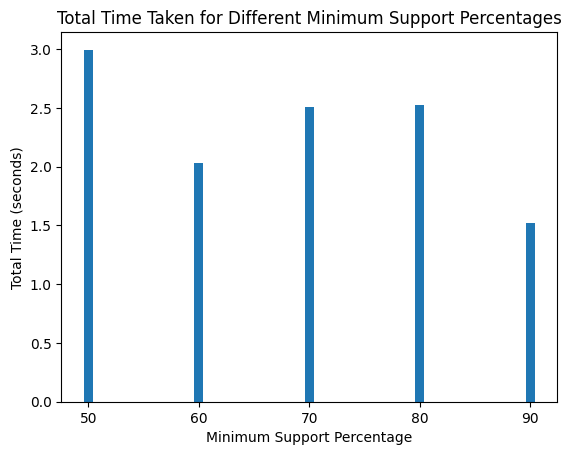

In [3]:
import time
import matplotlib.pyplot as plt

class Pattern:
    def __init__(self, itemset, support):
        self.itemset = itemset
        self.support = support

def has_infrequent_subset(c, Lk_minus_1):
    for i in range(len(c)):
        subset = tuple(c[:i] + c[i+1:])
        if subset not in Lk_minus_1:
            return True
    return False

def apriori_gen(Lk_minus_1):
    Ck = {}
    for i in range(len(Lk_minus_1)):
        for j in range(i+1, len(Lk_minus_1)):
            l1 = Lk_minus_1[i]
            l2 = Lk_minus_1[j]
            if l1[:-1] == l2[:-1] and l1[-1] < l2[-1]:
                c = l1 + (l2[-1],)
                if not has_infrequent_subset(c, Lk_minus_1):
                    Ck[c] = 0
    return Ck

def apriori(D, min_sup):
    L = {}
    Lk_minus_1 = {}
    Ck = {}

    for item in D:
        for i in item:
            Ck[(i,)] = Ck.get((i,), 0) + 1

    k = 1
    total_time = 0
    while Ck:
        Lk_minus_1 = Ck
        Lk = {}

        start_time = time.time()  # Start timing
        for c in Ck.keys():
            count = 0
            for t in D:
                if set(c).issubset(t):
                    count += 1
            if count >= min_sup:
                Lk[c] = count
                pattern = Pattern(c, count)
                print(f"Minimum_support: {min_sup}-Frequent {k}-itemset: {pattern.itemset} - support {pattern.support}")
        end_time = time.time()  # End timing
        iteration_time = end_time - start_time
        total_time += iteration_time

        L.update(Lk)
        k += 1
        Ck = apriori_gen(list(Lk.keys()))

    return L, total_time

def main():
    path = "/content/drive/MyDrive/Colab Notebooks/477/mushroom.dat"
    D = [] #transaction
    with open(path, "r") as ftpr:
        for line in ftpr:
            tokens = line.strip().split()
            tokens.sort()
            D.append(tokens)

    min_sup_percentages = [50, 60, 70,80,90]
    total_times = []

    for min_sup_percentage in min_sup_percentages:
        min_sup = int(min_sup_percentage * len(D) / 100)
        frequent_itemsets, total_time = apriori(D, min_sup)
        total_times.append(total_time)

        print(f"Total Time taken for Min Sup {min_sup_percentage}%: {total_time:.4f} seconds\n")

    # Create bar plot
    plt.bar(min_sup_percentages, total_times, align='center')
    plt.xlabel("Minimum Support Percentage")
    plt.ylabel("Total Time (seconds)")
    plt.title("Total Time Taken for Different Minimum Support Percentages")
    plt.xticks(min_sup_percentages)
    plt.show()

if __name__ == "__main__":
    main()
